In [1]:
import pandas as pd  # 데이터 전처리를 위해서 
import seaborn as sns # 시각화를 위해서 

df =  pd.read_csv('c:\\data\\skin.csv', encoding='UTF-8')

df = pd.get_dummies(df, drop_first=True)
df



,cust_no,age,gender_male,job_YES,marry_YES,car_YES,cupon_react_YES
0,1,30,1,0,1,0,0
1,2,20,0,1,1,1,0
2,3,20,0,1,1,0,0
3,4,40,0,0,0,0,0
4,5,30,0,0,1,0,0
5,6,30,0,0,0,1,0
6,7,20,0,0,1,0,0
7,8,20,0,0,1,1,1
8,9,30,0,1,1,0,1
9,10,40,1,1,0,1,1


In [2]:
# X = 전체 행, 마지막 열 제외한 모든 열 데이터 -> n차원 공간의 포인트
X = df.iloc[:,1:6].to_numpy() 
y = df.iloc[:,6].to_numpy()   

print(X)  # 149
print(y)  # 149

print(len(X))  # 149
print(len(y))  # 149


[[30  1  0  1  0]
 [20  0  1  1  1]
 [20  0  1  1  0]
 [40  0  0  0  0]
 [30  0  0  1  0]
 [30  0  0  0  1]
 [20  0  0  1  0]
 [20  0  0  1  1]
 [30  0  1  1  0]
 [40  1  1  0  1]
 [20  1  0  0  0]
 [30  1  0  1  1]
 [20  1  1  0  0]
 [30  0  1  1  0]
 [30  1  1  1  1]
 [30  0  1  0  0]
 [30  0  0  1  1]
 [20  1  1  1  0]
 [40  1  1  0  1]
 [40  0  1  1  0]
 [20  0  0  1  1]
 [30  1  0  0  0]
 [30  0  1  1  0]
 [30  1  1  0  1]
 [40  0  0  1  1]
 [30  1  0  1  0]
 [30  0  1  1  1]
 [40  0  1  0  1]
 [40  1  1  1  0]
 [40  0  1  1  0]]
[0 0 0 0 0 0 0 1 1 1 0 0 0 1 1 0 1 0 0 1 1 0 1 0 1 0 1 0 1 1]
30
30


In [3]:
from sklearn.model_selection import train_test_split 
                                                                                     
# 훈련 데이터 75, 테스트 데이터 25으로 나눈다. 
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.25, random_state = 10)

print(X_train.shape)   # (111, 4)
print(y_train.shape)   # (111,)


(22, 5)
(22,)


In [4]:
# 학습/예측(Training/Pradiction)
# sklearn 라이브러리에서 Decision Tree 분류 모형 가져오기
from sklearn import tree

#  의사결정트리 분류기를 생성 (criterion='entropy' 적용)
classifier = tree.DecisionTreeClassifier(criterion='entropy', max_depth=3)
#classifier = tree.DecisionTreeClassifier(criterion='gini', max_depth=3)
# 메뉴얼 : https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html

# 분류기 학습
classifier.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3)

In [5]:
# 특성 중요도
print(df.columns.values[1:6])
print("특성 중요도 : \n{}".format(classifier.feature_importances_))

df.columns.values[1:6]

df.shape[1]-2

classifier.feature_importances_

['age' 'gender_male' 'job_YES' 'marry_YES' 'car_YES']
특성 중요도 : 
[0.41471753 0.16602642 0.21955247 0.19970358 0.        ]


array([0.41471753, 0.16602642, 0.21955247, 0.19970358, 0.        ])

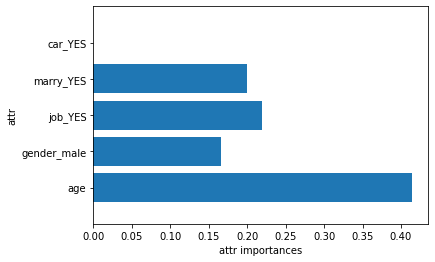

In [15]:
def plot_feature_importances_cancer(model):
    n_features = df.shape[1]-2
    plt.barh(range(n_features),model.feature_importances_, align='center')
    plt.yticks(np.arange(n_features), df.columns.values[1:6])
    plt.xlabel("attr importances")
    plt.ylabel("attr")
    plt.ylim(-1,n_features)

plot_feature_importances_cancer(classifier)
plt.show()

In [16]:
# 작은 이원교차표
from sklearn.metrics import confusion_matrix
conf_matrix= confusion_matrix(y_test, y_pred)
print(conf_matrix)    

[[5 0]
 [2 1]]


In [9]:
# 정밀도 , 재현율, f1 score 확인 
from sklearn.metrics import classification_report
report = classification_report(y_test, y_pred)
print(report)


              precision    recall  f1-score   support

           0       0.71      1.00      0.83         5
           1       1.00      0.33      0.50         3

    accuracy                           0.75         8
   macro avg       0.86      0.67      0.67         8
weighted avg       0.82      0.75      0.71         8



In [10]:
# 정확도 확인하는 코드 
from sklearn.metrics import accuracy_score
accuracy = accuracy_score( y_test, y_pred)
print( accuracy)

classifier.classes_



0.75


array([0, 1], dtype=uint8)

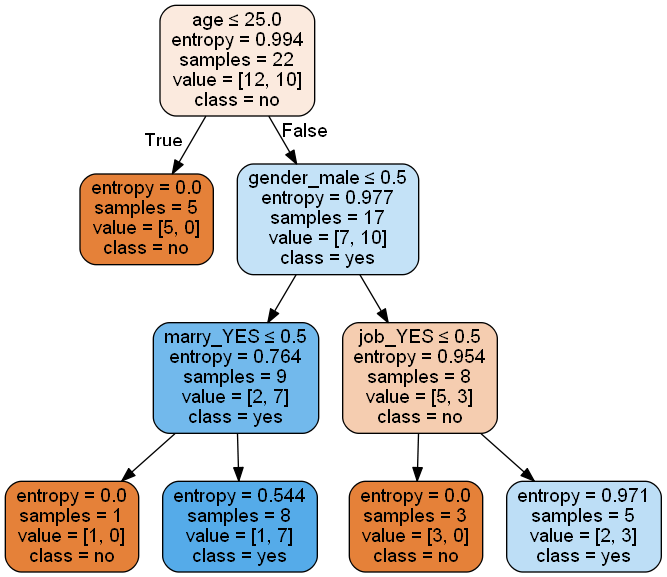

In [14]:
import pydotplus
from sklearn.tree import export_graphviz
from IPython.core.display import Image
import matplotlib.pyplot as plt

# 그래프 설정

# out_file=None : 결과를 파일로 저장하지 않겠다.
# filled=True : 상자 채우기
# rounded=True : 상자모서리 둥그렇게 만들기
# special_characters=True : 상자안에 내용 넣기

dot_data = export_graphviz(classifier, out_file=None,
                           feature_names=df.columns.values[1:6],
                           class_names=['no','yes'],
                           filled=True, rounded=True,
                           special_characters=True)
 
# 그래프 그리기

dot_data
graph = pydotplus.graph_from_dot_data(dot_data)


print(graph)

# 그래프 해석
#첫번째 줄 : 분류 기준
#entropy : 엔트로피값
#sample : 분류한 데이터 개수
#value : 클래스별 데이터 개수
#class : 예측한 답

dot_data
graph = pydotplus.graph_from_dot_data(dot_data)
Image(graph.create_png())